## Data source
https://www.kaggle.com/datasets/chazzer/smiling-or-not-face-data

This project is for binary classification of people images to smile and non-smile.

## 1. Loading image 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# locate train and valid directory
train_dir = '.../smile or not/train'
test_dir = '.../smile or not/test/*'

In [ ]:
# set input img size
img_size = (64, 64)

In [ ]:
# Normalize the pixel values
trainDataGenerator = ImageDataGenerator(rescale=1./255, validation_split=0.2)
testDataGenerator = ImageDataGenerator(rescale=1./255)

In [ ]:
# Read the img from the folder 
train_set = trainDataGenerator.flow_from_directory(
     train_dir ,
      color_mode="rgb",
      batch_size=16,
      target_size=img_size,
      class_mode="binary",
      subset="training")

valid_set = trainDataGenerator.flow_from_directory(
    train_dir ,
    color_mode="rgb",
    batch_size=16,
    target_size=img_size,
    class_mode="binary",
    subset="validation"
)

Found 963 images belonging to 2 classes.
Found 240 images belonging to 2 classes.


In [ ]:
train_set[0][0][0].shape

(64, 64, 3)

In [ ]:
print(train_set.class_indices)

{'non_smile': 0, 'smile': 1}


(16, 64, 64, 3)
(16,)
class: 0.0


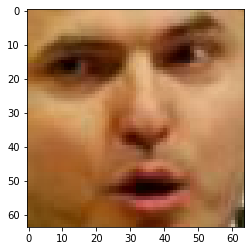

In [ ]:
# visulize sample img and class label; 'non_smile': 0, 'smile': 1 
for image_batch, labels_batch in train_set:
  print(image_batch.shape)
  print(labels_batch.shape)
  plt.imshow(image_batch[5])
  print('class:', labels_batch[5])
  break

## 2. Building the CNN model

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.keras import callbacks
from keras.callbacks import EarlyStopping

from sklearn.metrics import accuracy_score

In [ ]:
# Build the CNN model
model = keras.Sequential([
    Conv2D(128,(3,3), input_shape=(64,64,3),  activation="relu"),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64,(3,3), activation="relu"),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(64, activation="relu"),
    Dropout(rate=0.2),
    # the linear output layer 
    Dense(1,  activation="sigmoid")
])

In [ ]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 62, 62, 128)       3584      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 31, 31, 128)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 29, 29, 64)        73792     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 12544)             0         
                                                                 
 dense_4 (Dense)             (None, 64)               

In [ ]:
callback = EarlyStopping(monitor="val_accuracy",patience=10)

In [ ]:
# Train the model
history = model.fit(train_set, validation_data = valid_set, epochs=40, verbose =1, callbacks = callback)

Epoch 1/40
61/61 [==============================] - 152s 2s/step - loss: 0.5118 - accuracy: 0.7622 - val_loss: 0.3807 - val_accuracy: 0.8708
Epoch 2/40
61/61 [==============================] - 19s 309ms/step - loss: 0.3450 - accuracy: 0.8609 - val_loss: 0.3353 - val_accuracy: 0.9083
Epoch 3/40
61/61 [==============================] - 19s 311ms/step - loss: 0.2628 - accuracy: 0.9024 - val_loss: 0.2642 - val_accuracy: 0.8875
Epoch 4/40
61/61 [==============================] - 19s 306ms/step - loss: 0.2195 - accuracy: 0.9221 - val_loss: 0.2176 - val_accuracy: 0.9042
Epoch 5/40
61/61 [==============================] - 19s 305ms/step - loss: 0.1821 - accuracy: 0.9315 - val_loss: 0.1697 - val_accuracy: 0.9458
Epoch 6/40
61/61 [==============================] - 19s 307ms/step - loss: 0.1703 - accuracy: 0.9377 - val_loss: 0.1502 - val_accuracy: 0.9417
Epoch 7/40
61/61 [==============================] - 21s 343ms/step - loss: 0.1221 - accuracy: 0.9595 - val_loss: 0.1968 - val_accuracy: 0.9333
E

## 3. Model evaluation
- using loss and accuracy

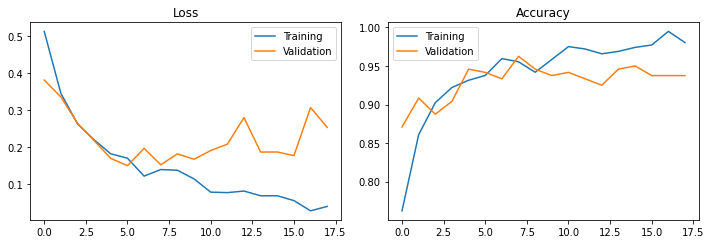

In [ ]:
plt.figure(figsize = (10,3.5))
plt.subplot(1,2,1)
plt.title('Loss')
plt.plot(history.history['loss'], label = 'Training')
plt.plot(history.history['val_loss'], label = 'Validation')
plt.legend()

plt.subplot(1,2,2)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label = 'Training')
plt.plot(history.history['val_accuracy'], label = 'Validation')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
accuracy = model.evaluate(valid_set, verbose = 0)
print(f'Score: {accuracy[1]:.3f}')

Score: 0.938


## 4. Predict class of images

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def smile_nonsmile(list):
  y_pred = []
  y_pred_classification = []
  img_list = []
  
  for i in list:
    img = load_img(i, target_size = img_size)
    img = img_to_array(img)
    img /=255.0
    img_list.append(img)

    img = np.expand_dims(img, axis = 0)
    y_pred_i = model.predict(img)
    y_pred_classification_i = 'smile' if y_pred_i > 0.5 else 'non-smile'
    y_pred.append(y_pred_i)
    y_pred_classification.append(y_pred_classification_i)

  return img_list, y_pred_classification, y_pred

In [ ]:
import glob 
import os.path

In [ ]:
mylist = [f for f in glob.glob(test_dir)]
img_list, y_pred_classification, y_pred  = smile_nonsmile(mylist)

1/1 [==============================] - 0s 24ms/step


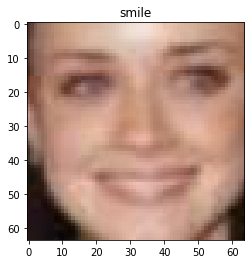

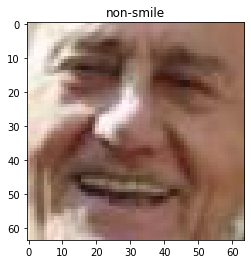

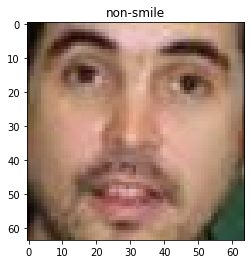

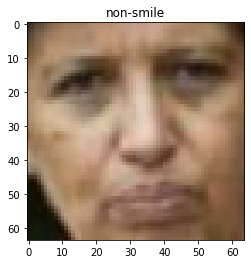

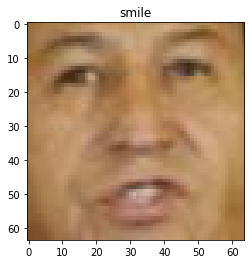

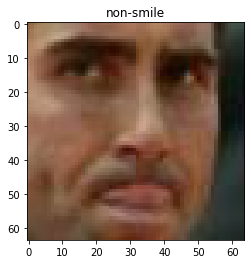

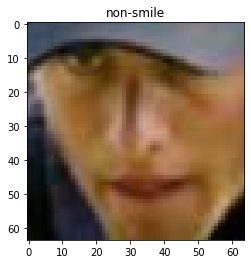

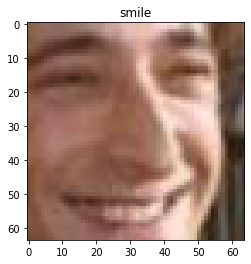

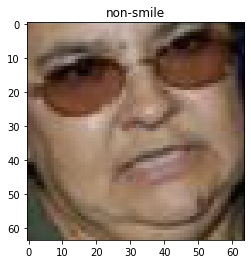

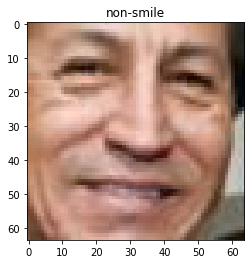

In [ ]:
for i in range(10):
  plt.imshow(img_list[i])
  plt.title(f'{y_pred_classification[i]}')
  plt.show()